In [2]:
import pandas as pd, pickle, re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

## 일반 카페 글

In [5]:
# 나머지 카페 글 불러오기
df1 = pd.read_csv('depression_book.csv') # 승현
df2 = pd.read_csv('depression_girl.csv') # 승현
df3 = pd.read_csv('spec_up_2000.csv') # 하린
df4 = pd.read_csv('munhwa_2000.csv') # 하린
df5 = pd.read_csv('powder_2000.csv') # 하린
df6 = pd.read_csv('story.csv') # 승현
df7 = pd.read_csv('write.csv') # 현경
df8 = pd.read_csv('eat.csv') # 현경
df10 = pd.read_csv('ebook.csv') # 현경
df11 = pd.read_csv('story_2.csv') # 승현
df12 = pd.read_csv('fun.csv') # 승현
df13 = pd.read_csv('brunch.csv') # 승현

In [6]:
# null값 제거
df1 = df1.dropna(axis=0)
df2 = df2.dropna(axis=0)
df3 = df3.dropna(axis=0)
df4 = df4.dropna(axis=0)
df5 = df5.dropna(axis=0)
df6 = df6.dropna(axis=0)
df7 = df7.dropna(axis=0)
df8 = df8.dropna(axis=0)
df10 = df10.dropna(axis=0)
df11 = df11.dropna(axis=0)
df12 = df12.dropna(axis=0)
df13 = df13.dropna(axis=0)

In [7]:
# 데이터 프레임 내 a 없애기
def rem(a,df):
    col = list(df.columns)
    for i in col:
        df[i] = df[i].apply(lambda x: re.sub(a,'',x))
    return df

In [8]:
# 광고 올리는 아이디 제거
def bad_del(df4):
    bad = []
    for i in list(df4.index):
        if 'http' in df4.content.loc[i]:
            bad.append(df4.name.loc[i])
    for i in df4['name']:
        if i in bad:
            df4 = df4[df4['name']!=i]
    return df4

In [9]:
# 키워드 포함 열 제거
def key_del(a,df4):
    bad = []
    for i in list(df4.index):
        if a in df4.content.loc[i]:
            bad.append(i)
    df4 = df4.drop(bad, axis = 0)
    return df4

In [10]:
# 책읽기
df1.head(5)

,date,name,content
0,2019.10.01. 00:27,홍콩여행찬규,만두를 먹을수있어서 감사합니다
1,2019.09.27. 09:12,하바드,내 맘에 들지 않는 사람을 쳐냈었는데 처음으로 손을 내밀어봤습니다. 그 손을 잡아주...
2,2019.09.22. 22:56,홍콩여행찬규,버스를탈수있어서 감사합니다
3,2019.09.21. 23:28,꿈 장유주,삶이 무료해지고 이제 또 즐거운 무언가를 찾고 있었습니다. 또 의미없이 시간 보내는...
4,2019.09.19. 16:59,낭만무역가송재주,"붓다의 유언을 읽을 수 있어서 감사했습니다.. “제행이 무상하니, 방일하지 말고 정..."


In [11]:
# 연애
df2.head(5)

,date,name,content
0,2018.12.13. 21:52,공듀,내가 원하는것 이뤄질때까징
1,2018.07.23. 11:24,생기발랄,그럼에도 불구하고. 나는 나아간다
2,2018.07.03. 13:09,아에이오우앙,"사랑받는다는 것이 무엇인지, 맞춰가는것이 무엇인지 느끼면서 살아갈수 있기를"
3,2018.04.05. 10:55,두루미,대수로운 이야기는 아닌데 글 쓸때 하단에 자동으로 불러오는 little which ...
4,2018.03.14. 23:10,사랑받는별,으아아아아앙ㅠㅁㅠ 요즘 실습하느라 정신 없어서 올해 들어 처음 리버티를 놓쳤네여ㅠㅠ...


In [12]:
# 스펙업
df3.sample(5)

,content,date,name,title
1844,\n,2019.05.14. 20:28,\n\n산유정\n\n,인천이혼상담 운율에서 전해드립니다!
790,\n,2019.07.23. 16:52,\n\n이지이지쏘이지\n\n,하루 지났지만 삼계탕 먹었습니당 ㅎㅎㅎ
1538,\n,2019.05.13. 14:53,\n\n럽럽러브\n\n,어시스트 보험 서비스 여쭤볼게 있습니다~~
1454,"\n ? ? ? 바로 양재 시민의 숲에서열리는 가족과 친구, 연인과 함께 방...",2019.05.15. 11:38,\n\ncessna79\n\n,주말 갈 만한 곳 | 자연휴양림 30주년 기념 휴문화한마당 및 숲교육어울림행사
1896,\n\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t\n\t\t\t\t\t...,2019.05.05. 22:21,\n\n길길우\n\n,한강에 봄나들이 다녀왔어요.


In [13]:
# 문화
df4.sample(5)

,content,date,name,title
1814,\n 자정 넘어서 끝난 영화라 ㅜㅜ오늘 6시에 출근해서ㅜㅜ너무 피곤한데...ost들...,2019.06.27. 09:22,\n\n큐랭랭큐\n\n,어제 알라딘 밤영화 보고왔어요
1402,\n https://m.huffingtonpost.kr/entry/story_kr_...,2019.07.18. 09:25,\n\n책과영화\n\n,유니클로 재팬은 사과한 적이 없다
1202,\n 킹덤 아동청소년 심리상담연구소 무료 부모교육 주제: 주의력결핍과잉 행동장...,2019.07.29. 10:06,\n\n꾸미별\n\n,무료 부모교육-주의력결핍과잉 행동장애 이해 및 주의집중력 훈련기술
100,\n 힘든 수요일이지만월급이 들어오니까 열심히 일해야겠어요즐거운 하루 보내세요*^^*,2019.09.25. 09:34,\n\n청춘힘내\n\n,오늘은 월급날♡
768,\n ?반딧불 여행 9월1일자를 보니 8월 무더위가 벌써 끝나감을 느낍니다. ...,2019.08.21. 16:46,\n\n돌핀스\n\n,문화충전 밧딧불 여행 좋네요.


In [14]:
# 피우더룸
df5.sample(5)

,content,date,name,title
427,\n 원래 시드니랑 멜버른 알아보던중케언스 찾고보니 너무이뻐서 꼭 가고싶어서그런데그...,2019.09.30. 21:04,\n\nlullululu\n\n,호주 케언즈 가보신분들 계실까요??
920,"\n ㅜ지나고보니실수인거같기도하고,,31살인언니한테 이번에 유럽갔다왔길래저도30살되...",2019.09.30. 18:29,\n\niliiililiiliil\n\n,31살언니한테 30살되기전에 여행갔다오는게 꿈이다 이얘기하면 기분나빴을까요
1410,\n http://mapi.wemakeprice.com/mobile_app/dire...,2019.09.30. 15:44,\n\n어대오\n\n,오늘 뚜레쥬르 털러갑니당ㅋㅋㅋ
524,\n 책 세페이지 읽었는데집중력깨짐.. 책도 너무 재미없네요.무식자도 쉽게 맥을 잡...,2019.09.30. 20:36,\n\n카 레\n\n,저 집중력장애인가봐요
648,\n 3500-5000원이던데 꼬리 귀까지 움직여서 너무 귀여워요,2019.09.30. 19:56,\n\n블루파우더7\n\n,열쇠고리


In [15]:
# 일상
df6.sample(5)

,date,name,title,content
66,2019.08.07. 23:23,빛나는,[8/7] 감사 확언 일기,오늘은 조금 걸을 수 있어서 감사합니다.. 간단한 스트레칭도 조금 해볼 수 있어 감...
387,2019.09.01. 22:04,눈뜬 가지,le 1 septembre 2019,푹 잘 자고 일어나서 감사합니다.기부 강연 잘 들을 수 있어서 감사합니다.언니가 초...
752,2019.09.30. 21:07,빛나는,(9/30) 확언 빽빽이,나는 날마다 모든 면에서 점점 더 좋아지고 있습니다.
295,2019.08.25. 08:23,우하핫,[감사일기] 감사일기,휴일 가족 챙기느라 바빴습니다감사합니다동갑들과의 만남감사합니다난 운이 좋습니다감사합니다
218,2019.08.19. 00:32,빛나는,(8/18) 확언 빽빽이,나는 어쨌든 **합니다!


In [16]:
# 글쓰기
df7.sample(5)

,title,date,name,content,len
56,왕자님들과 공주님들...,2017.12.05. 10:35,다크블루100,얼마전 일본 관계사 직원과 미팅 자리가 있었습니다. 공식적인 회의전에 잠깐 개인적...,1568
107,길,2017.08.18. 18:11,해피간디,결국 문제는 길을 어떻게 갈것인가에 있다 돌아서 갈것인가? 곧장 갈것인가? 노래 부...,320
58,일상 : 새벽.,2017.12.04. 01:32,천강,매주 목 금 일 3일간 요로코롬 생긴 노트북과 함께 하며 집 근처 24시 카페에서 ...,130
163,다이어트를 하기로 결심하면서 제 10화,2017.06.12. 16:49,작가소공자,안녕하세요 소공자입니다. 바로 연재 들어갈게요^^ 조절기 2주차(드디어!!!...,650
170,다이어트를 시작하면서 제 7화,2017.06.05. 17:01,작가소공자,안녕하세요 소공자입니다^^ 이제 한주의 시작이네요^^ 힘차게 연재 들어갑니다...,238


In [17]:
# 맛집
df8.sample(5)

,title,date,name,content,len
75,우울한 요즘 .ㅠㅠ,2019.09.27. 15:25,바람을타고,우을감이 드는데,8
35,청주오창은 축제중입니다,2019.09.29. 10:02,누릉지,오창미래지공원에서청원생명축제중이네요 다음주 일요일까지 생명축제합니다 드넓은 꽃밭에는...,652
9,발가락에 모기물린거 꽤 아프네요,2019.09.30. 10:54,주현아,하......진짜,9
81,닭가슴살 볼 먹을만 하네요,2019.09.27. 13:58,1spoon,저는 평일 점심은 어차피 뭘 먹어도 그저 그러니 (오후 업무 스트레스 땜에 ㅠㅠ)...,208
50,오늘 날씨 진짜 좋네요! 따스하니!,2019.09.27. 22:20,daejeontop1,오늘 일하는도중 계속 졸았네요 ㅋㅋㅋㅋㅋㅋ,23


In [18]:
# ebook
df10.sample(5)

,title,date,name,content,len
58,[데일리운동] D+50 피로는 사라지지 않았다고 합니다....,2019.09.27. 10:06,잇칭,ㅋㅋㅋㅋㅋ늦었어요 죄손해영일단 열어둘게요!,23
95,가장 중요한 것을..,2019.09.26. 00:47,책대추,치약을 사온다는게 까묵고 과자만 양껏 사왔네요 과자가 요즘 미니버전으로 많이 나오네...,196
65,부품용 리페프 패널 수리하는게 좋을까요?,2019.09.26. 23:23,깊은바다,나중을 대비한 부품용이라는 이유로 썩히고 있는데 사실 배터리나 나중에 사용하면 하지...,305
29,방탈출 게임을 하는 꿈을 꿨습니다,2019.09.28. 22:18,집행인 제로,방탈출 게임을 하는 꿈을 꿨습니다. 저는 실제로 저 게임을 해보지 않아서 어떤 형...,765
36,먹구름인줄 알았는데...!!!,2019.09.28. 12:47,노모어,큰불이 났네요 ㅎㄷ ㄷ,12


In [19]:
# 무한긍정
df11.sample(5)

,date,name,content
1205,2010.07.24. 10:38,푸른미리내,일 준비하는 핑계 대느라고 이리저리. 게으름만 늘었네요^^. 가능성의 파티때 뵈요~~
50,2015.11.24. 18:51,소랑소랑,내 아이를 있는 그대로 사랑할 수 있기를 . 쉽게 분노하고 지치는내 마음이 평...
443,2012.01.23. 11:59,신기루,좋은 카페를 알게되어 다행입니다.
1063,2010.09.09. 19:50,아몬드맘,지하철 잘못타서 노량진까지 가공~~ ㅎㅎㅎㅎ. 잼있다~~
322,2012.06.26. 13:28,주르주르,좋은 하루 되세요~~^^


In [20]:
# 유머
df12.sample(5)

,date,name,content
1238,2019.04.12. 03:17,리르,논란의 글 삭제 했습니다반성의 의미는 없구요이대로면 리벤지 포르노 유포자가 될거 같...
1105,2019.04.27. 22:26,ROTY,아르페지오와 애시드를 동시에 쓰니 너무 난잡한 느낌도 있어서 내린 결단은 애시드를 ...
831,2019.06.01. 19:25,ROTY,기계요소설계 공부랑 과제를 하고 있지만 정작 들어오는 내용이 전혀 없다.(어느 수준...
1031,2019.05.07. 20:57,시대유감,아무리 생각해도. 타노스가 히어로고. 어벤져스가 빌런인거 같다
1201,2019.04.17. 07:43,시대유감,요새 자꾸 개꿈을 꿉니다.... . .


In [21]:
# 무한긍정
df13.sample(5)

,content,title,name
66,브런치를 처음 알게 된 계기는 군대 선임이자 브런치 작가로 활동했던 서준형님 덕분이...,한중커플의 소원이야기,조병원
853,"__7월 31일 수요일,에어컨 만세만세 만만세.통영에 살 땐 밤에 선풍기도 한 번 ...",20190731 이숭이의 하루,이숭이
251,2019년 6월 17일에 작성된 이야기입니다.한 달 넘게 글을 못 썼다. 체력 하나...,"신명 나게 일하고 싶다면, 몬카요의 와팡고",아멜리 Amelie
266,"""저녁 뭐 해줄까?""라는 어머니(장모님)의 물음에난 대부분 위와 같이 답한다.이와 ...",가족이 함께 살아간다는 것은,브랜딩인가HR인가
100,"9월 25일, 더운데 춥고 추운데 더운 이상한 날씨. 친구의 말이 마음을 울렁이게 ...",너와 가까운 곳에 있겠다는 말,송송


In [22]:
len(df1),len(df2)

(1278, 493)

In [23]:
len(df3),len(df4),len(df5),len(df6)

(1968, 1988, 1987, 815)

In [24]:
len(df7),len(df8),len(df10),len(df11)

(220, 129, 120, 1712)

In [25]:
len(df12),len(df13)

(1477, 672)

In [26]:
len(df13.name.unique())

395

df9 = pd.concat([df1['content'], df2['content'], df7['content'], df8['content'], df7['title'], df8['title']
                , df10['content'], df10['title']],axis = 0)
df9 = pd.DataFrame(df9).reset_index(drop=True)
df9 = df9.rename(columns={0 :'content'})
df9

In [27]:
# 데이터 프레임 전부 다 합치기

df9 = pd.concat([df1['content'], df2['content'], df3['content'], df4['content'], df11['content'],
                 df5['content'], df6['content'], df7['content'], df8['content'], df10['content'],
                df12['content'], df13['content']],axis = 0)
df9 = pd.DataFrame(df9).reset_index(drop=True)
df9 = df9.rename(columns={0 :'content'})
df9

,content
0,만두를 먹을수있어서 감사합니다
1,내 맘에 들지 않는 사람을 쳐냈었는데 처음으로 손을 내밀어봤습니다. 그 손을 잡아주...
2,버스를탈수있어서 감사합니다
3,삶이 무료해지고 이제 또 즐거운 무언가를 찾고 있었습니다. 또 의미없이 시간 보내는...
4,"붓다의 유언을 읽을 수 있어서 감사했습니다.. “제행이 무상하니, 방일하지 말고 정..."
...,...
12854,(직장인들은 공감할 수 있을 것 같은데) 요즘 나에게하루 중 가장 길게 느껴지는 시...
12855,오랜 시간 동안 네이버 블로그에 글을 적어왔다.일본에서 살기 전에는 일본 여행 관련...
12856,"토요일 아침. 사람들이 주말을 시작하는 풍경은 어떨까? 밀린 늦잠을 자는 사람들도,..."
12857,벌써 르완다 생활이 1년 하고도 5개월.왠지 1년 차는 예전에 지나간 느낌인데 아직...


In [28]:
def rem(a,df):
    col = list(df.columns)
    for i in col:
        df[i] = df[i].apply(lambda x: re.sub(a,'',x))
    return df
rem(' ',df9)

,content
0,만두를먹을수있어서감사합니다
1,내맘에들지않는사람을쳐냈었는데처음으로손을내밀어봤습니다.그손을잡아주어서감사합니다.자존심...
2,버스를탈수있어서감사합니다
3,삶이무료해지고이제또즐거운무언가를찾고있었습니다.또의미없이시간보내는일을찾을수도있었는데좋...
4,"붓다의유언을읽을수있어서감사했습니다..“제행이무상하니,방일하지말고정진하라"""
...,...
12854,(직장인들은공감할수있을것같은데)요즘나에게하루중가장길게느껴지는시간은출퇴근시간이다.매일...
12855,오랜시간동안네이버블로그에글을적어왔다.일본에서살기전에는일본여행관련으로적기시작하다가일본...
12856,"토요일아침.사람들이주말을시작하는풍경은어떨까?밀린늦잠을자는사람들도,벌써하루를준비해나가..."
12857,벌써르완다생활이1년하고도5개월.왠지1년차는예전에지나간느낌인데아직1년6개월이채되지않았...


In [29]:
# 말줄임표

list_dot = ['.'*i for i in range(12, 1, -1)]

def short_1(a,df):
    col = list(df.columns)
    for i in col:
        df[i] = df[i].apply(lambda x: x.replace(a,'말줄임표'))
    return df

def short(df):
    for a in list_dot:
        short_1(a,df)
    return df

In [29]:
short(df9)

,content
0,만두를먹을수있어서감사합니다
1,내맘에들지않는사람을쳐냈었는데처음으로손을내밀어봤습니다.그손을잡아주어서감사합니다.자존심...
2,버스를탈수있어서감사합니다
3,삶이무료해지고이제또즐거운무언가를찾고있었습니다.또의미없이시간보내는일을찾을수도있었는데좋...
4,"붓다의유언을읽을수있어서감사했습니다말줄임표“제행이무상하니,방일하지말고정진하라"""
...,...
12854,(직장인들은공감할수있을것같은데)요즘나에게하루중가장길게느껴지는시간은출퇴근시간이다.매일...
12855,오랜시간동안네이버블로그에글을적어왔다.일본에서살기전에는일본여행관련으로적기시작하다가일본...
12856,"토요일아침.사람들이주말을시작하는풍경은어떨까?밀린늦잠을자는사람들도,벌써하루를준비해나가..."
12857,벌써르완다생활이1년하고도5개월.왠지1년차는예전에지나간느낌인데아직1년6개월이채되지않았...


# 문장단위로 분리
def sent(df):
    content = []
    content_1 = []
    content_2 = []
    for sen in df:
        content_1.extend(sen.split('.'))
    for sen in content_1:
        content_2.extend(sen.split('?'))
    for sen in content_2:
        content.extend(sen.split('!'))
    return content

content = sent(df9['content'])

In [30]:
content=[df9['content'].loc[i] for i in df9.index]

In [31]:
len(content)

12859

In [32]:
# 이상한거 없애기
for i in range(len(content)):
    if '\xa0' in content[i]:
        content[i] = content[i].replace('\xa0','')

for i in range(len(content)):
    if '\n' in content[i]:
        content[i] = content[i].replace('\n','')

for i in range(len(content)):
    if '\t' in content[i]:
        content[i] = content[i].replace('\t','')

In [33]:
# 광고 없애기
hmm = ['com/','http','(주)','eft','EFT','①','전화:','<','부탁드립니다', '어플',
       '장소:','시간:','/','-','%','@','팝니다','팔아요','[','(']

for i in hmm:
    for con in content:
        if i in con:
            content.remove(con)

# 말줄임표를 마침표 용도로 사용한 문장들 처리
for i in content:
    a = i.split('말줄임표')
    b = []
    c = []
    for k in a:
        if len(k)>=2:
            b.append(k)
    if len(b)>=2:
        for k in b[:-1]:
            if k[-1]== '다' or k[-1]== '요':
                c.append(k+'말줄임표')
        c.append(b[-1])
    if len(c)>=2:
        content.remove(i)
        content.extend(c)

k=[]
for i in content:
    if len(i)>50:
        f=i.split('요')
        for d in f[:-1]:
            k.append(d+'요')
        k.append(f[-1])
        
k
for i in range(len(k)):
    if k[i]=='말줄임표':
        k[i-1]+='말줄임표'
k

for i in range(len(k)):
    try:
        if k[i][-2]=='필':
            k[i]=k[i]+k[i+1]
            k[i+1]=''
    except:
        continue
        

k   

content.extend(k)

In [34]:
# 중복된 문장 제거
content = set(content)
content = list(content)
len(content)

8833

In [35]:
content

['',
 '문화의날이라그런지인기검색어에사자랑엑시트가있네용ㅎㅎㅎㅎ무대인사예매한게둘다날짜가겹치기도하고영화장르도완전달라서...지금둘중에어떤영화를보러갈지너무고민이네여',
 '고속버스타고올라가다내린휴게소.구미휴게소인데휴게소내에요런시설도있네요ㅎㅎ',
 '1일부터월요일이면.그달이정~말길게느껴지더라고요.특히7월처럼31일이나되면서새까만달은.최악',
 '저는노포를정말좋아하는데그이유는첫번째오래된집은맛에서실패할확률이적고두번째로는그세월이주는감성이술을들이붓게만들거든요!!노포많이아시는분있으면공유해요ㅋㅋㅋㅋㅋㅋmyungsoo90제인스타아이디인데요제가다니는노포조금씩업로드하는중입니다여기도참고하세요팔로우는선택입니다ㅋㅋㅋ',
 '이시간전남비바람이몰아칩니다.ㅋㅋ.......낼일있는데..시끄러워서잠도안오고...아침에는좀괜찮아져야할텐데....',
 '요즘카페음악이너무좋아요~~새해를정갈하게시작하는데도움이될듯해요^^*',
 '근로자의날오늘도일을할수있는직장이있음에감사^^헤헤오늘은어떤사람들을만나게될지두근두근~~모두모두최고의하루되시어요~~^^',
 '유럽의옥천HUB라불리는Defraa에서일주일동안배송준비가걸려있네요ㅠㅠ다음주말에출장가야해서그전에와야하는데...와이프님께걸리면작살날텐데말이죠',
 '여유롭게물속걷기를하고왔습니다감사합니다오늘을살기로했습니다감사합니다난운이좋습니다감사합니다',
 '오늘도안전한하루되어감사합니다',
 '아자힘내자',
 '경력직이직준비하고있습니다.중소제약회사다니고있습니다.연구직인데,하는것마다시비거는상사....감정소비가심한데전어떻게해야할까요?ㅜㅜ전제가문제인줄알고열심히참았습니다.하지만다른직원들이저의이런상황을보고,정말저상사는쓸데없는이상한것가지고시비를거는것처럼보인다라고하고있습니다.비슷한결과물을가지고갔는데저한텐온갖비하에다가신경질하고,다른직원한텐아무말도안하고그러네요.도대체저한테왜그러는걸까요.별잘못을한것같지도않은데,남자직원에겐별말안하고저한테만그러니,남녀차별인건가싶은생각도마구드네요.가뜩이나연봉낮아서옮기려고하는데이상사가퇴사의욕구를더뿜뿜시켜주네요.ㅠㅠㅠ?',
 '저번달엔티브이이번달엔세탁기가고장~왜이런걸까요~?돈이

for i in content:
    if len(i)>0:
        if i[-1]=='요':
            content.remove(i)

In [36]:
df9 = pd.DataFrame(content, columns=['content'])

# 0글자 이하 없애기
df9['len']=df9.content.apply(lambda x: len(x))
df9 = df9[df9['len']>0]

df9.head(5)

,content,len
1,문화의날이라그런지인기검색어에사자랑엑시트가있네용ㅎㅎㅎㅎ무대인사예매한게둘다날짜가겹치기도...,82
2,고속버스타고올라가다내린휴게소.구미휴게소인데휴게소내에요런시설도있네요ㅎㅎ,38
3,1일부터월요일이면.그달이정~말길게느껴지더라고요.특히7월처럼31일이나되면서새까만달은.최악,48
4,저는노포를정말좋아하는데그이유는첫번째오래된집은맛에서실패할확률이적고두번째로는그세월이주는...,142
5,이시간전남비바람이몰아칩니다.ㅋㅋ.......낼일있는데..시끄러워서잠도안오고...아침...,61


In [37]:
len(df9)

8832

In [38]:
df9['label']=0

In [39]:
df9.to_csv('normal.csv',index=False)

# 우울증 카페 글

In [40]:
#우울증 카페 글 불러오기
df1 = pd.read_csv('depression_jook.csv') # 승현
df2 = pd.read_csv('depression_NLP_2.csv') # 현경
df3 = pd.read_csv('depression__memo.csv') # 하린
df4 = pd.read_csv('search_naver4.csv') # 승현
df5 = pd.read_csv('Dep_cafe_crawling_hk.csv') # 현경
df6 = pd.read_csv('search_naver_2.csv') # 현경
df7 = pd.read_csv('depression_newlife.csv') # 현경
df8 = pd.read_csv('depression_newlifememo.csv') # 현경
df10 = pd.read_csv('depression_feelingdep.csv') # 현경
df11 = pd.read_csv('depression_depinsomnia.csv') # 현경

In [41]:
len(set(list(df4['content'])))

1934

In [42]:
len(df1),len(df2),len(df3),len(df4),len(df5),len(df6),len(df7),len(df8)

(1613, 616, 1977, 3463, 23928, 726, 7113, 749)

In [43]:
df1.sample(5)

,date,name,content
422,2018.12.31. 20:51,Lily Flower,인생을 참 잘못 살아온거 같다.
477,2018.11.17. 22:38,세일러묵,여기 가입한지 5년ㅇㅣ 지났고.. 잊었다 생각했는데..다시 돌아왔네요ㅎ
610,2018.08.21. 03:58,지향,잠 잘자다가 다시 ㅜㅜ 새벽에 또 깨고 안드네요 ㅜㅜ 충분히 잤건지 애매하구나
302,2019.05.02. 21:34,꼬마법사,힘내자!!
1489,2014.09.26. 13:07,우컁이,ㅇ ㅏ~~코피~!!


In [44]:
df2.sample(5)

,title,date,name,content
60,7월 30일날 드림위즈 메일이 종료된다네요.,2019.07.26. 17:14,만원버스,제가 드림위즈 관리자에게 메일로 물어보았더니..저한데 이렇게 답변왔더군요.회사가 모...
86,모은글 2,2019.07.06. 01:31,beblue,불안해지면 본능에 따라 행동하게 된다진흙길이건 황금길이건 그 길을 누구와 함께 걷느...
376,이카페 들어온이유?,2018.09.04. 22:07,탐니,서로아픔공유하고자 하는것 아님? 왜 위로도못할망정 부정적인글들이많어 대체적으로 이카...
473,많이 힘드네요,2018.05.17. 03:14,grave,3년전에도 비가 많이 왔었는데..오늘도 그때처럼 오는것 같네요. 아무리 시간이 지나...
272,정신과는 티가 많이 나나 봅니다,2019.01.21. 14:19,piggleman,정신과4급입니다 하염없이 군대만 기다릴수 없어서 알바를 시작했습니다 마트 알바였...


In [45]:
df3.sample(5)

,date,name,content
1188,2015.04.18. 23:37,킁킁이11,나한테진짜왜그러냐..나우울증있으니까조심해달라고그렇게말했는데왜당신들기분대로나한테왜화풀...
745,2018.02.12. 03:16,네,아무것도하지않는데하루가짧다.그짧은하루에도어쩜매일같은생각뿐인지..다른생각좀해보자.
1451,2014.04.10. 15:31,로누,마음이평온하면모든것이편안하다.
858,2016.11.09. 22:01,kurt,누가나를잡아줬으면근데그럴일은없지
960,2016.03.14. 22:46,빛과소금,사람들을다잃고후회해도어쩔수없었다고내업이었다고그러고말아야지그때는


In [46]:
df4.sample(5)

,title,content
2804,죽고 싶어요,를 자퇴하고 그나마 굶어죽지는 않으려고 국비지원 미용학교를 다니고 있는 고3 학생이...
192,NaN,청소년이 혼자 우울증 검사 가능한가요?전 중1여자인데요 중학교 입학하고 하루후에 스...
3174,NaN,NaN
2046,내공80우울증일까요?,피자 1판은 거뜬했던 제가 식욕이떨어지고 조금만 먹어도 먹기싫어지고 매일밤 잠도 ...
3003,NaN,NaN


In [47]:
df5.sample(5)

,content,len
20187,하지만시간이지나면서제가자해한다는걸부모님이알게되었습니다저는그제야학교생활이많이힘들었고그...,78
22061,제가걱정하는것은우리아빠생신에어떤선물을드리면좋을지걱정이에요말줄임표우리아빠생신이점점가까...,125
12152,무슨말인지모르겠다내가하던공부맞나오늘은맥주나먹고낼부터할까부다,32
8419,도데체월급을받으면그월급을어디다쓰고금방쓰는지,23
579,저보고잘때묻더군요,9


In [48]:
df6.sample(5)

,content,len
355,이 약들이 우울증에 사용될수있나요?조울증약으로ㅠ알고있는대,0
497,기존에 몇번의 자살시도로 이중우울증이라고 진단 받은적이 있습니다 6년전 즈음 입니다...,15
219,우울해서 마음이 가라앉고 답답해서 울고 나서도 몇 분 후면 멍을 때리고 아무 생각이...,17
208,"우울증 3년 8개월, 조울증 6개월차 앓고 있는 사람입니다.병원을 몇차례 다녔고 중...",7
516,일을 하면서 여러 가지 스트레스를 받고매일 똑같이 반복되는 상황에 서서히허무함을 느...,18


In [49]:
df7.sample(5)

,content,len
4817,그리고특이한것이정신신경증B군에서유일하게현실논리를펼치는증상이라고하고요,37
3231,만나서자살하자는사람도많고그냥카페가면징징거리는,24
4019,어떤사람은전혀개의치않는것에스트레스를받는자신의모습은없나요,30
2307,저는거의학원땜에친구랑놀시간이없거든요,19
3402,저희집은저와2살위인오빠부모님으로구성되어있습니다,25


In [50]:
df8.sample(5)

,content,len
344,해외에서는독감으로스무명정도의미성년자가죽었다카던데나도독감으로앓다가죽었으면좋겠다,42
702,아버지가암에걸리셨다말줄임표,14
476,기분나빠서이제그카페안가려구요ㅎㅎ,17
391,이렇게많이잘거그냥평생잠만자고싶다,17
384,지난나에대한자기성찰및새로운다짐을하게되는데말줄임표너무자주하는거같기도하고말줄임표,42


In [51]:
df10.sample(5)

,content
503,우울해요고등학교 1학년인데 그냥 너무 우울해요. 요즘 계속 울어요. 그냥 밤이나 새...
647,때부터 기분이 안 좋았는데 밤이 되니까 갑자기 우울해지고 울고 싶어지네요..그리고 ...
6,하세요 저는 직장인 남자친구와 연애중인 대학생 여자입니다남자친구가 입사한지 얼마 안...
375,우울증과 우울에피소드 몇가지 질문드립니다.1.제 병명이 중등도 우울 에피소드인데요(...
844,이 우울하거나 슬플때 그 우울함과 슬픔을 더욱 느끼고 싶을때가 있습니다아니면 그냥 ...


In [52]:
df11.sample(5)

,title,content
514,"우울증, 대인기피증, 불면증 극복방법",증 때문에 대인기피증과 불면증도 같이 온 것 같아요 셋 다 확실한데 어떻게 극복해야...
716,"내공50불면증,우울증 치료방법",자친구가 불면증과 우울증으로 약을 복용한지 3년정도 되었습니다 약을 먹고도 잠이 안...
73,내공45우울증과 불면증의 정도,가 아래와 같은 우울증과 불면증 약을 복용하고 있습니다.어느 정도 심각한 상태인지요...
197,NaN,우울증 공황발작 불면증 제 정신병인데 지금 미친듯이 불면증이 심합니다 처방받은 약물...
690,"불면증, 우울증, 공황장애 치료",하세요 30대 직장인입니다.몇년간 불면증을 겪고 수면제를 먹지않으면 잠을 못잡니다....


In [53]:
df0 = pd.concat([df1['content'],df2['content'],df3['content'],df4['content'],df10['content'],df11['content'],
                 df5['content'],df6['content']],axis=0)
df0=df0.dropna()
df0 = pd.DataFrame(df0).reset_index(drop=True)
df0

,content
0,일어나자마자. 살기 싫은 하루.. 이럴줄 알았지만 ㅎㅎ
1,내가 없어져도 해는 매일 뜨겠죠..
2,"선택의 후회,,"
3,오늘도 살아야하네...에휴...
4,니가 하고 싶은대로 행동하면난 어쩌란거니?도대체 어느 장단에 마춰야할지 모르겠어.이...
...,...
33807,"이게 우울증인지 뭔지 모르겠어서,,,, 예전에 상담 클리닉 다니면서 상담도 받았는데..."
33808,안녕하세요 24살 여자입니다 고등학교 졸업 후 바로 부모님회사에서 일을 시작하게 되...
33809,"제 친구가 있는데요.. 친구관계때문에 많이 힘든가봐요수업시간에 공책에 ""우울감=>우..."
33810,"제가 우울증이 있는데..답변1글자크기 조절, 질문하기, 답변쓰기 메뉴제가 원래는 누..."


In [54]:
rem(' ',df0)
short(df0)

,content
0,일어나자마자.살기싫은하루말줄임표이럴줄알았지만ㅎㅎ
1,내가없어져도해는매일뜨겠죠말줄임표
2,"선택의후회,,"
3,오늘도살아야하네말줄임표에휴말줄임표
4,니가하고싶은대로행동하면난어쩌란거니?도대체어느장단에마춰야할지모르겠어.이래도저래도난너한...
...,...
33807,"이게우울증인지뭔지모르겠어서,,,,예전에상담클리닉다니면서상담도받았는데조금좋아졌다가요새..."
33808,안녕하세요24살여자입니다고등학교졸업후바로부모님회사에서일을시작하게되었어요2년6개월동안...
33809,"제친구가있는데요말줄임표친구관계때문에많이힘든가봐요수업시간에공책에""우울감=>우울증""이라..."
33810,"제가우울증이있는데말줄임표답변1글자크기조절,질문하기,답변쓰기메뉴제가원래는누가봐도밝고활..."


# 문장 단위로 분리
content = []
content_1 = []
content_2 = []
for sen in df0['content']:
    content_1.extend(sen.split('.'))
for sen in content_1:
    content_2.extend(sen.split('?'))
for sen in content_2:
    content.extend(sen.split('!'))

In [55]:
content=list(df0['content'])

In [56]:
# 중복된 문장 제거
content = set(content)
content = list(content)
len(content)

31186

In [57]:
# 이상한거 없애기
for i in range(len(content)):
    if '\xa0' in content[i]:
        content[i] = content[i].replace('\xa0','')

for i in range(len(content)):
    if '\n' in content[i]:
        content[i] = content[i].replace('\n','')

for i in range(len(content)):
    if '\t' in content[i]:
        content[i] = content[i].replace('\t','')

In [58]:
# 광고 없애기
hmm = ['com/','<광고>','http','(주)','엄마','친구','동생','언니','누나','오빠','아빠']

for i in hmm:
    for con in content:
        if i in con:
            content.remove(con)

# 말줄임표를 마침표 용도로 사용한 문장들 처리
for i in content:
    a = i.split('말줄임표')
    b = []
    c = []
    for k in a:
        if len(k)>=2:
            b.append(k)
    if len(b)>=2:
        for k in b[:-1]:
            if k[-1]== '다' or k[-1]== '요':
                c.append(k+'말줄임표')
        c.append(b[-1])
    if len(c)>=2:
        content.remove(i)
        content.extend(c)

k=[]
for i in content:
    if len(i)>50:
        f=i.split('요')
        for d in f[:-1]:
            k.append(d+'요')
        k.append(f[-1])
        
k
for i in range(len(k)):
    if k[i]=='말줄임표':
        k[i-1]+='말줄임표'
k

for i in range(len(k)):
    try:
        if k[i][-2]=='필':
            k[i]=k[i]+k[i+1]
            k[i+1]=''
    except:
        continue
        

k   

content.extend(k)

content = set(content)
content = list(content)
len(content)

In [59]:
# DataFrame 으로 만들기
df0 = pd.DataFrame(content, columns=['content'])

# 0글자 이하 없애기
df0['len']=df0.content.apply(lambda x: len(x))
df0 = df0[df0['len']>0]

df0.head(5)

,content,len
0,저는이런말을듣고우르르무너졌습니다,17
1,갑자기우울함이몰려든다,11
2,너요즘보기좋더라자꾸배우려고하고노력하는모습이너무예뻐,27
3,우울하지도않고불안한건쬐금있다그닥죽고싶지도살고싶지도않다희안하다충동적인생각이드는건있다가...,127
4,"제가그동안좋아했던여자들의1/3만,,아니1~2명만이라도성공을했더라면,이런상황에웃으며넘...",360


In [60]:
df0[df0['len']>50]

,content,len
3,우울하지도않고불안한건쬐금있다그닥죽고싶지도살고싶지도않다희안하다충동적인생각이드는건있다가...,127
4,"제가그동안좋아했던여자들의1/3만,,아니1~2명만이라도성공을했더라면,이런상황에웃으며넘...",360
5,두달전에공황장애증상으로쓰러지고나서부터는우울증과불안증이와서회사까지그만두게되었습니다말줄...,115
13,잇다약타고오늘은또뭐하지투데이쉐떠뻑투마로우셔터뻑먼데이투데이아플예정sick점점사람들을멀...,131
16,외모지상주의엄청심해요길가다가혹은차에서신호기다리다가아니면식당에서밥먹다가지나가는사람들얼...,69
...,...,...
26354,"우리는아이의부정적인면은교정하고,긍정적인면은강화해나가면더이상삶이우울해있지않고,활력을되...",53
26359,전23살여자구요되도록여성분이었으면좋겠어요많이우울하고힘들어서사람이만나고싶어요저녁식사하...,68
26361,그리고혼자만지내다보니취미또한팝음악감상이나축구경기보기같은지극히혼자만깊게파고들수있는취미...,51
26362,없는사실을있는거처럼꾸며내서저를아주바보로만들었더군요ㅡㅡ그러더니저랑카톡한그남자애는서른살...,113


In [61]:
df0['label'] = 1

In [62]:
df0.to_csv('depression_sum.csv')

## 두 데이터 합치기

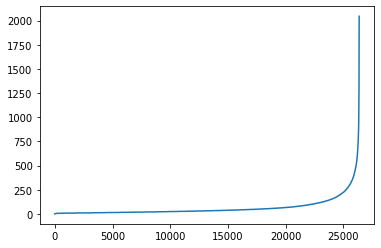

In [63]:
plt.plot(range(len(df0)),df0['len'].T.sort_values())

In [64]:
df0.describe()

,len,label
count,26367.000000,26367.0
mean,64.595858,1.0
std,102.032947,0.0
min,1.000000,1.0
25%,18.000000,1.0
50%,33.000000,1.0
75%,65.000000,1.0
max,2044.000000,1.0


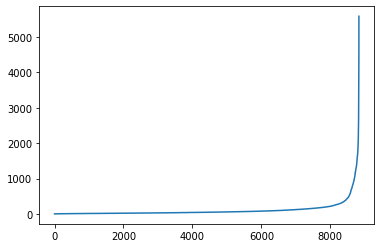

In [65]:
plt.plot(range(len(df9)),df9['len'].T.sort_values())

In [66]:
df9.describe()

,len,label
count,8832.000000,8832.0
mean,109.108243,0.0
std,239.730596,0.0
min,1.000000,0.0
25%,23.000000,0.0
50%,48.000000,0.0
75%,103.000000,0.0
max,5589.000000,0.0


In [67]:
# 50 글자 이상 제거
df9 = df9[df9['len']<200]
df0 = df0[df0['len']<200]

In [68]:
df9

,content,len,label
1,문화의날이라그런지인기검색어에사자랑엑시트가있네용ㅎㅎㅎㅎ무대인사예매한게둘다날짜가겹치기도...,82,0
2,고속버스타고올라가다내린휴게소.구미휴게소인데휴게소내에요런시설도있네요ㅎㅎ,38,0
3,1일부터월요일이면.그달이정~말길게느껴지더라고요.특히7월처럼31일이나되면서새까만달은.최악,48,0
4,저는노포를정말좋아하는데그이유는첫번째오래된집은맛에서실패할확률이적고두번째로는그세월이주는...,142,0
5,이시간전남비바람이몰아칩니다.ㅋㅋ.......낼일있는데..시끄러워서잠도안오고...아침...,61,0
...,...,...,...
8828,오렌만에메일확인했는데.광고대행사한테서메일이몇군대왔네요.안하는게낫겠죠?,38,0
8829,자꾸열받으면먹을려고하고,12,0
8830,다른날들도그렇지만오늘은더욱그림확언이좋네요^^배경음악들도연말분위기를더욱풍성하게해주네요...,77,0
8831,목요일인데아직목감기임,11,0


In [69]:
# 교집합제거
content_0 = [i for i in df0['content']]
content_9 = [i for i in df9['content']]
content_0 = set(content_0)
content_9 = set(content_9)
content_1 = content_0 & content_9
content_0 = list(content_0-content_1)
content_9 = list(content_9-content_1)

In [70]:
len(content_1)

10

In [71]:
# DataFrame 으로 만들기
df0 = pd.DataFrame(content_0, columns=['content'])

# 0글자 이하 없애기
df0['len']=df0.content.apply(lambda x: len(x))
df0 = df0[df0['len']>0]

df0.head(5)
df0['label'] = 1

In [72]:
df0.to_csv('data_depressed.csv', index = False)

In [73]:
# DataFrame 으로 만들기
df9 = pd.DataFrame(content_9, columns=['content'])

# 0글자 이하 없애기
df9['len']=df9.content.apply(lambda x: len(x))
df9 = df9[df9['len']>0]

df9.head(5)
df9['label'] = 0

In [74]:
df9.to_csv('data_normal.csv', index = False)

In [75]:
len(df0),len(df9)

(24684, 7880)

In [76]:
# 일반글(df9)가 더 많기 때문에 같은 양으로 under-sampling
df0 = df0.sample(7880).reset_index(drop=True)

In [77]:
df9

,content,len,label
0,행복합니다.감사합니다.^^,14,0
1,삶을풍요롭게만드는이에프티톡톡톡!!!.꿀추석을모두잘보내고계시죠?.남은휴일도행복하세요!,46,0
2,문화의날이라그런지인기검색어에사자랑엑시트가있네용ㅎㅎㅎㅎ무대인사예매한게둘다날짜가겹치기도...,82,0
3,고속버스타고올라가다내린휴게소.구미휴게소인데휴게소내에요런시설도있네요ㅎㅎ,38,0
4,1일부터월요일이면.그달이정~말길게느껴지더라고요.특히7월처럼31일이나되면서새까만달은.최악,48,0
...,...,...,...
7875,글하나하나읽어가며느끼는게많은새벽ㅎ.불면증인가잠을못자네다들굿잠이요ㅎ,36,0
7876,다른날들도그렇지만오늘은더욱그림확언이좋네요^^배경음악들도연말분위기를더욱풍성하게해주네요...,77,0
7877,목요일인데아직목감기임,11,0
7878,"결혼한남자가회식할때마다단순직장동료인여자한테잘잘도착했냐,조심히들어가라,쉬어라등등매번카...",79,0


In [78]:
df9.loc[len(df9)]=['기분이좋다',5,0]

In [79]:
df0.loc[len(df0)]=['기분이나쁘다',6,1]

In [80]:
df = pd.concat([df0,df9],axis = 0)
df = df.reset_index(drop = True)
df.head(5)

,content,len,label
0,하나님에대한신앙이최우선이라하지만내눈엔자신의말=하나님의말이라고생각하는거같음,40,1
1,내인생이가장힘들었던건나를무어라설명할수없었기때문이다,27,1
2,저는집이싫습니다,8,1
3,힘이없고우울하다,8,1
4,"제가깨있어도1시반까지하는애인데뭐하나궁금해서나갔더니막마우스클릭소리나는데,화면보면네이버입니다",49,1


In [81]:
df.tail(5)

,content,len,label
15757,다른날들도그렇지만오늘은더욱그림확언이좋네요^^배경음악들도연말분위기를더욱풍성하게해주네요...,77,0
15758,목요일인데아직목감기임,11,0
15759,"결혼한남자가회식할때마다단순직장동료인여자한테잘잘도착했냐,조심히들어가라,쉬어라등등매번카...",79,0
15760,후...워터파크탈의실에서사진찍어대는인간들왜이리많은지모르겠네요.찍으려면지들도수영복벗고...,53,0
15761,기분이좋다,5,0


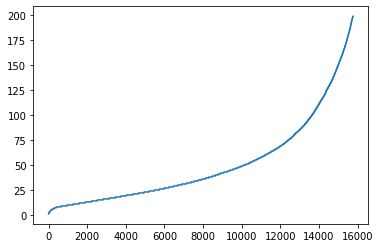

In [82]:
plt.plot(range(len(df)),df['len'].T.sort_values())

## 토크나이저, 인코딩, pad_sequences

with open('./data_DataFrame.pickle', 'rb') as handle:
    input_data = pickle.load(handle)

In [83]:
_input1 = df['content']
_label = df['label']

In [84]:
cleaning =lambda s: re.sub("[^가-힣a-zA-Z.!?\\s]","",s)

In [85]:
# 형태소 단위로 토크나이즈
tokenizer = Okt()
_input1 = [ tokenizer.morphs(cleaning(str(sentence))) for sentence in _input1]

In [86]:
_input1

[['하나님',
  '에',
  '대',
  '한',
  '신앙',
  '이',
  '최',
  '우선',
  '이라',
  '하지만',
  '내',
  '눈',
  '엔',
  '자신',
  '의',
  '말',
  '하나님',
  '의',
  '말',
  '이라고',
  '생각',
  '하',
  '는',
  '거',
  '같음'],
 ['내',
  '인생',
  '이',
  '가장',
  '힘들었던건',
  '나를',
  '무어',
  '라',
  '설명',
  '할수',
  '없었기',
  '때문',
  '이다'],
 ['저', '는', '집', '이', '싫습니다'],
 ['힘', '이', '없고', '우울하다'],
 ['제',
  '가',
  '깨있어도',
  '시반',
  '까지',
  '하는',
  '애',
  '인데',
  '뭐',
  '하',
  '나',
  '궁금해서',
  '나갔더니',
  '막',
  '마우스',
  '클릭',
  '소리',
  '나',
  '는데',
  '화면',
  '보면',
  '네이버',
  '입니다'],
 ['내', '인생', '은', '왜', '이럴까', '정말', '빈', '껍데기', '같다', '말줄임표'],
 ['너', '키', '작고', '잘생기지도', '않았어'],
 ['검색',
  '해서',
  '그대로',
  '추천',
  '하지말고',
  '진짜',
  '본인',
  '이',
  '읽어',
  '본',
  '책',
  '을',
  '추천',
  '해주시기',
  '바랍니다',
  '.'],
 ['저', '는', '그건', '자식', '들', '인생', '망치는거라고', '생각', '합니다'],
 ['치료',
  '하다가',
  '좋아져',
  '서단',
  '약했는데',
  '아내',
  '가',
  '좋아진것',
  '같더니',
  '우울증',
  '이',
  '년',
  '만에',
  '다시',
  '또',
  '재발',
  '됐네요',
  '성인',
  'ADHD',
  '치료',
  '방법

In [98]:
#feature 줄이기
num_words=17814

In [99]:
# 인코딩
keras_tokenizer = Tokenizer(num_words=num_words)
#keras_tokenizer = Tokenizer()
keras_tokenizer.fit_on_texts(_input1)
_input = keras_tokenizer.texts_to_sequences(_input1) 

word_dict = keras_tokenizer.word_index # 단어와 인덱스 딕셔너리

max_len = max([len(sentence) for sentence in _input])

In [100]:
len(word_dict)

48238

In [101]:
word_dict

{'.': 1,
 '이': 2,
 '을': 3,
 '에': 4,
 '가': 5,
 '는': 6,
 '말줄임표': 7,
 '도': 8,
 '감사합니다': 9,
 '를': 10,
 '들': 11,
 '은': 12,
 '..': 13,
 '?': 14,
 '하': 15,
 '의': 16,
 '요': 17,
 '한': 18,
 '...': 19,
 '하고': 20,
 '저': 21,
 '나': 22,
 '으로': 23,
 '다': 24,
 '생각': 25,
 '에서': 26,
 '내': 27,
 '너무': 28,
 '로': 29,
 '제': 30,
 '사람': 31,
 '!': 32,
 '오늘': 33,
 '고': 34,
 '만': 35,
 '그': 36,
 '때': 37,
 '우울증': 38,
 '과': 39,
 '것': 40,
 '합니다': 41,
 '적': 42,
 '게': 43,
 '마음': 44,
 '일': 45,
 '면': 46,
 '서': 47,
 '더': 48,
 '시간': 49,
 '입니다': 50,
 '잘': 51,
 '많이': 52,
 '....': 53,
 '하루': 54,
 '지': 55,
 '못': 56,
 '그냥': 57,
 '인': 58,
 '정말': 59,
 '말': 60,
 '인데': 61,
 '좋은': 62,
 '사랑': 63,
 '분': 64,
 '와': 65,
 '니': 66,
 '까지': 67,
 '날': 68,
 '아': 69,
 '에게': 70,
 '부터': 71,
 '안': 72,
 '좀': 73,
 '이나': 74,
 '지금': 75,
 '네': 76,
 '중': 77,
 '해서': 78,
 '요즘': 79,
 '할': 80,
 '진짜': 81,
 '왜': 82,
 '기분': 83,
 '때문': 84,
 '정도': 85,
 '님': 86,
 '??': 87,
 '집': 88,
 '글': 89,
 '이런': 90,
 '약': 91,
 '모든': 92,
 '시작': 93,
 '전': 94,
 '같아요': 95,
 '뭐': 9

In [102]:
index_word = keras_tokenizer.index_word

In [103]:
index_word[2061]

'보이지'

In [104]:
max_len

108

In [105]:
_input = pad_sequences(_input, maxlen=max_len, padding='post')
#_label = [ to_categorical(_l) for _l in _label] 

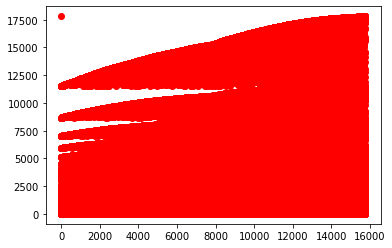

In [106]:
plt.plot(_input, 'ro')
plt.show()

In [107]:
_input[1]

array([   27,   158,     2,   525, 17813,   291, 11519,   168,  1156,
         768,    84,   110,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0,
           0,     0,     0,     0,     0,     0,     0,     0,     0])

In [108]:
_label[:10]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: label, dtype: int64

In [109]:
data = [max_len, num_words+1,keras_tokenizer,_input, _label]
with open('input_data.pickle', 'wb') as handle:
    pickle.dump(data, handle,protocol = pickle.HIGHEST_PROTOCOL)

tokenizer_json = keras_tokenizer.to_json()
with open("keras_tokenizer.json", "w") as json_file : 
    json_file.write(tokenizer_json)

In [110]:
data = [keras_tokenizer, max_len]
with open('word_dict.pickle', 'wb') as handle:
    pickle.dump(data, handle,protocol = pickle.HIGHEST_PROTOCOL)

## 나중에 인풋 데이터 전처리 코드

In [ ]:
a = input()

import pandas as pd, pickle, re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import tensorflow as tf



with open('word_dict.pickle', 'rb') as handle:
    data = pickle.load(handle)

keras_tokenizer, word_dict, max_len = data

def prep(a):
    cleaning =lambda s: re.sub("[^가-힣a-zA-Z.!?\\s]","",s)
    tokenizer = Okt()
    
    content = []
    content_1 = []
    content_2 = []
    
    content_1.extend(a.split('.'))
        
    for sen in content_1:
        content_2.extend(sen.split('?'))
    for sen in content_2:
        content.extend(sen.split('!'))
    content = set(content)
    content = list(content)
    
    df = pd.DataFrame(content, columns=['content'])
    df['len']=df.content.apply(lambda x: len(x))
    df = df.drop(list(df[df['len']<7].index),axis = 0)
    
    if len(content)==1:
        _input1 = [tokenizer.morphs(cleaning(str(a)))]
    else:
        _input1 = df['content']
        _input1 = [tokenizer.morphs(cleaning(str(sentence))) for sentence in _input1]
        
    _input1 = keras_tokenizer.texts_to_sequences(_input1) 
    _input1 = pad_sequences(_input1, maxlen=max_len, padding='post')

        
    return _input1

print(prep(a))

In [ ]:
prep(a)